# Neural Networks

Neural networks are computing systems inspired by the brain's neural networks. They are composed of layers of nodes that can learn to recognize patterns and make decisions. These systems are widely used for tasks that involve recognizing complex patterns, such as image and voice recognition.

In this notebook, we build a simple neural network that includes:

- **Input Layer**: Where the data is introduced to the network.
- **Hidden Layers**: Where intermediate processing occurs, using the sigmoid activation function for non-linearity.
- **Output Layer**: Where the final predictions are made, using the softmax function for classification.

The learning process of the network is based on adjusting weights through an algorithm called Gradient Descent. This algorithm tweaks the internal parameters of the network to reduce the difference between the actual and predicted outputs, a process known as minimizing the loss.

![Alt text](neural_networks.png)

## Key Equations

The sigmoid function, which adds non-linearity to the model, is represented as:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

During the training, we update the network's weights \\( \theta \\) using a measure of the error, which involves calculating the derivative of the loss with respect to the weights. The learning rate \\( \alpha \\) controls how big of a step we take on each update.


In [18]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Activation and Loss Functions

We define the sigmoid and softmax activation functions for the neurons. The cross-entropy function is used to calculate the loss.


In [13]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Cross-entropy loss and its derivative
def cross_entropy(y_true, y_pred):
    # Add epsilon to prevent division by zero
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred))

def cross_entropy_derivative(y_true, y_pred):
    return y_pred - y_true

# Initialize weights and biases
def initialize_weights(input_size, hidden1_size, hidden2_size, output_size):
    W1 = np.random.randn(input_size, hidden1_size) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden1_size))
    W2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(2. / hidden1_size)
    b2 = np.zeros((1, hidden2_size))
    W3 = np.random.randn(hidden2_size, output_size) * np.sqrt(2. / hidden2_size)
    b3 = np.zeros((1, output_size))
    return [W1, W2, W3], [b1, b2, b3]

# Forward propagation
def forward_propagation(X, weights, biases):
    A = X
    cache = [(None, X)]
    for W, b in zip(weights, biases):
        Z = A.dot(W) + b
        if W is not weights[-1]:  # Not the last layer
            A = sigmoid(Z)
        else:
            A = softmax(Z)
        cache.append((Z, A))
    return cache

# Backward propagation
def backward_propagation(y_true, cache, weights):
    Z, A = cache[-1]
    dZ = cross_entropy_derivative(y_true, A)
    dWs = []
    dBs = []
    
    for i in reversed(range(len(weights))):
        Z, A_prev = cache[i]
        W = weights[i]
        dW = A_prev.T.dot(dZ) / len(y_true)
        dB = np.mean(dZ, axis=0, keepdims=True)
        if i > 0:
            dZ = dZ.dot(W.T) * sigmoid_derivative(A_prev)
        dWs.insert(0, dW)
        dBs.insert(0, dB)
    return dWs, dBs

# Update parameters
def update_parameters(weights, biases, dWs, dBs, alpha):
    for i in range(len(weights)):
        weights[i] -= alpha * dWs[i]
        biases[i] -= alpha * dBs[i]
    return weights, biases

# Training function
def train(X_train, y_train, input_size, hidden1_size, hidden2_size, output_size, alpha, epochs):
    weights, biases = initialize_weights(input_size, hidden1_size, hidden2_size, output_size)
    for epoch in range(epochs):
        cache = forward_propagation(X_train, weights, biases)
        dWs, dBs = backward_propagation(y_train, cache, weights)
        weights, biases = update_parameters(weights, biases, dWs, dBs, alpha)
        
        # Calculate and print the loss every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == epochs - 1:
            cost = cross_entropy(y_train, cache[-1][1])
            print(f"Epoch {epoch + 1}/{epochs}, Cost: {cost:.4f}")
    return weights, biases

# Prediction function
def predict(X, weights, biases):
    cache = forward_propagation(X, weights, biases)
    A_last = cache[-1][1]
    return np.argmax(A_last, axis=1)

## Data Preprocessing

The Iris dataset is loaded, and the features are standardized. The data is then split into training and testing sets for model evaluation.


In [14]:
# Prepare the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
y_onehot = np.eye(3)[y]  # Convert to one-hot encoding

# Split and standardize the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Neural Network

The neural network is trained over several epochs, where the weights are updated to minimize the loss after each epoch.


In [15]:
# Neural network hyperparameters
input_size = 4  # Iris dataset features
hidden1_size = 10
hidden2_size = 10
output_size = 3  # Iris dataset classes
alpha = 0.1  # Learning rate
epochs = 200  # Number of epochs for training

# Train the neural network
weights, biases = train(X_train_scaled, y_train, input_size, hidden1_size, hidden2_size, output_size, alpha, epochs)

Epoch 10/200, Cost: 0.3812
Epoch 20/200, Cost: 0.3611
Epoch 30/200, Cost: 0.3529
Epoch 40/200, Cost: 0.3450
Epoch 50/200, Cost: 0.3368
Epoch 60/200, Cost: 0.3282
Epoch 70/200, Cost: 0.3191
Epoch 80/200, Cost: 0.3095
Epoch 90/200, Cost: 0.2996
Epoch 100/200, Cost: 0.2894
Epoch 110/200, Cost: 0.2790
Epoch 120/200, Cost: 0.2687
Epoch 130/200, Cost: 0.2585
Epoch 140/200, Cost: 0.2486
Epoch 150/200, Cost: 0.2392
Epoch 160/200, Cost: 0.2302
Epoch 170/200, Cost: 0.2217
Epoch 180/200, Cost: 0.2137
Epoch 190/200, Cost: 0.2063
Epoch 200/200, Cost: 0.1993


## Model Evaluation and Visualization

Post-training, the model's accuracy is assessed on the test data. A confusion matrix is plotted to visualize the model's classification performance.


In [16]:
# Evaluate the model
y_pred = predict(X_test_scaled, weights, biases)
y_test_class = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_class, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report")
print(classification_report(y_test_class, y_pred, target_names=iris.target_names))


Test Accuracy: 84.44%

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.46      0.63        13
   virginica       0.65      1.00      0.79        13

    accuracy                           0.84        45
   macro avg       0.88      0.82      0.81        45
weighted avg       0.90      0.84      0.83        45



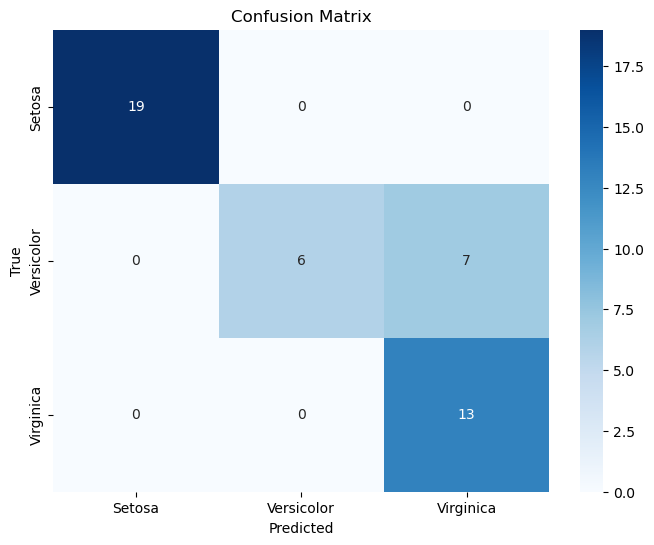

In [19]:
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))  # Optional: you can define the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Conclusion

The neural network trained on the Iris dataset achieved an accuracy of 84.44%, showing it can effectively classify iris species most of the time. The model did exceptionally well with the Setosa species but had some difficulty telling Versicolor and Virginica apart.

As the cost decreased steadily during training, this indicates our model was learning from the data as expected. However, the mix-up between Versicolor and Virginica suggests there might be room to improve the model, perhaps by tweaking the network design or training for more epochs.

Overall, the results are encouraging and demonstrate the neural network's capability to learn patterns and make predictions in a multi-class classification problem.